In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_moons

In [3]:
x,y= make_moons(n_samples=300, noise=0.3, random_state=42)

df= pd.DataFrame(x, columns=['Feature 1', 'Feature 2'])
df['Target']=y

In [4]:
df

,Feature 1,Feature 2,Target
0,0.924865,-0.237611,1
1,2.587875,-0.112862,1
2,-0.421033,0.447485,1
3,0.693145,0.481778,0
4,1.190855,-0.525165,1
...,...,...,...
295,0.549172,-0.032601,1
296,0.459609,1.315941,0
297,-0.752523,0.977316,0
298,1.360850,-0.091428,1


In [5]:
df.head()

,Feature 1,Feature 2,Target
0,0.924865,-0.237611,1
1,2.587875,-0.112862,1
2,-0.421033,0.447485,1
3,0.693145,0.481778,0
4,1.190855,-0.525165,1


In [6]:
df.shape

(300, 3)

In [7]:
df.info

<bound method DataFrame.info of      Feature 1  Feature 2  Target
0     0.924865  -0.237611       1
1     2.587875  -0.112862       1
2    -0.421033   0.447485       1
3     0.693145   0.481778       0
4     1.190855  -0.525165       1
..         ...        ...     ...
295   0.549172  -0.032601       1
296   0.459609   1.315941       0
297  -0.752523   0.977316       0
298   1.360850  -0.091428       1
299  -0.302331   0.876713       0

[300 rows x 3 columns]>

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Feature 1,300.0,0.502476,0.927187,-1.717729,-0.087971,0.473627,1.161598,2.827142
Feature 2,300.0,0.269174,0.576712,-1.177543,-0.116878,0.287239,0.684790,1.768665
Target,300.0,0.500000,0.500835,0.000000,0.000000,0.500000,1.000000,1.000000


In [9]:
df.isnull().sum()

Feature 1    0
Feature 2    0
Target       0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

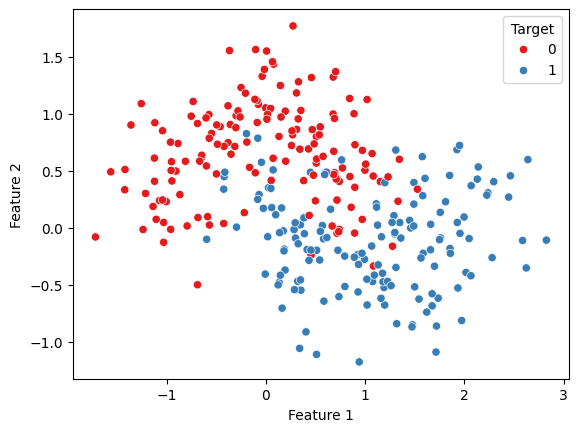

In [11]:
sns.scatterplot(x='Feature 1', y='Feature 2', data=df, hue='Target', palette='Set1')
plt.show()

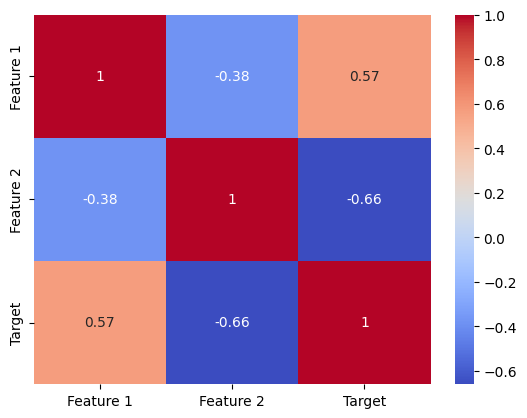

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [13]:
x=df.drop('Target', axis=1)
y=df['Target']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

pipeline= Pipeline(
    steps=[('Scalar', StandardScaler()),
           ('KNN', KNeighborsClassifier(n_neighbors=19))]
)

In [16]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('Scalar', StandardScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=19))])

In [17]:
y_pred=pipeline.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [18]:
from sklearn.metrics import accuracy_score, classification_report

In [19]:
print(f"Accuracy (k=19): {accuracy_score(y_test, y_pred)}")

Accuracy (k=19): 0.85


In [20]:
from sklearn.model_selection import cross_val_score

k_range= range(1,21)
cv_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(knn, x, y, cv=5, scoring='accuracy')
    cv_score.append(scores.mean())


In [21]:
cv_score

[np.float64(0.8666666666666666),
 np.float64(0.86),
 np.float64(0.8966666666666667),
 np.float64(0.8966666666666665),
 np.float64(0.9),
 np.float64(0.8933333333333333),
 np.float64(0.8966666666666667),
 np.float64(0.8899999999999999),
 np.float64(0.8966666666666665),
 np.float64(0.9033333333333333),
 np.float64(0.8933333333333333),
 np.float64(0.8933333333333333),
 np.float64(0.8933333333333333),
 np.float64(0.89),
 np.float64(0.8933333333333333),
 np.float64(0.8866666666666667),
 np.float64(0.8866666666666667),
 np.float64(0.8866666666666667),
 np.float64(0.8833333333333334),
 np.float64(0.89)]

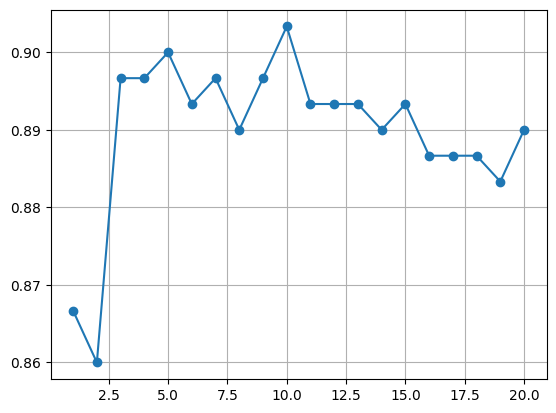

In [22]:
plt.plot(k_range, cv_score, marker='o')
plt.grid()
plt.show()

In [23]:
best_k= k_range[np.argmax(cv_score)]
print(f"Best K From corss Validation {best_k}")

Best K From corss Validation 10


In [24]:
pipeline1= Pipeline(
    steps=[('Scalar', StandardScaler()),
           ('KNN', KNeighborsClassifier(n_neighbors=best_k))]
)

In [25]:
pipeline1.fit(x_train, y_train)

Pipeline(steps=[('Scalar', StandardScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=10))])

In [26]:
best_k_y_pred=pipeline1.predict(x_test)
best_k_y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [27]:
print(f"Accuracy (k={best_k}): {accuracy_score(y_test, best_k_y_pred):.2f}")


Accuracy (k=10): 0.88


In [28]:
df.head(1)

,Feature 1,Feature 2,Target
0,0.924865,-0.237611,1


In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
new_data=[[0.8, 0.9]]
prediction= pipeline1.predict(new_data)
prediction[0]

np.int64(0)

In [31]:
import joblib

joblib.dump(pipeline1, 'KNN.pkl')

KNN=joblib.load('KNN.pkl')

**FOR RAW DATA**

In [32]:
dataset={'Weight':[51, 62, 69, 64, 65, 56, 58, 57],
         'Height':[167, 182, 176, 173, 172, 174, 169, 173],
         'Class' : ['U', 'N', 'N', 'N', 'N', 'U', 'N', 'N']
         
         }
df1= pd.DataFrame(dataset, index=range(1,9))
df1

,Weight,Height,Class
1,51,167,U
2,62,182,N
3,69,176,N
4,64,173,N
5,65,172,N
6,56,174,U
7,58,169,N
8,57,173,N


In [33]:
x=df1.drop('Class', axis=1)
y=df1['Class']


In [34]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
new_data=[[55, 170]]
prediction=knn.predict(new_data)
prediction[0]


'N'